<h1 style="font-size:32px; text-align:center;">A Simple Introduction to Principle Component Analysis</h1>
<hr>
<h1 style="font-size:18px; text-align:center; margin-bottom:24px;">Carl Lejerskar</h1>
<hr>

Sometimes you are given a dataset with too many features to handle, and you might just have a couple thousand rows to work with. You instantly resort to visualization, descriptive statistics, and supervised models such as Lasso to ascertain which features are keepers, and which aren't. While these tools are obviously critical for feature selection and are necessary for effective data preparation, when there are hundreds of variables the task becomes very daunting. In these cases PCA is a great tool in the box that may be able to help. PCA is an unsupervised learning method focused on the variability of the data that provides a way for you to quickly reduce the dimension of your data while creating a new, manageable dataset to work with. In this notebook I will manually perform PCA on a very simple data matrix as an exercise to help demonstrate the concept.

### The Statistics: 

*Note: This formulation of PCA is based on the eigenvalue decomposition of $\mathbf{X^T X}$. Most formulations found online and applied in computation follow the Singular Value Decomposition of $\mathbf{X}$, so I thought I would add another resource for the former.*

Principle Component Analysis is a statistical method that allows for the P features in a data matrix $\mathbf{X}$ to be linearly transformed into a set of orthogonal vectors through its dot product with the eigenvector matrix of $\mathbf{X^T X}$. Each of these orthogonal vectors, or Principle Components, are associated with an eigenvalue of $\mathbf{X^T X}$. The Principle Component corresponding to the largest eigenvalue captures the highest amount of variability in the data, and the percentage of total variability captured within the data matrix is equal to the ratio of the Principle Component's corresponding eigenvalue divided by the sum of all eigenvalues. This allows for a metric to perform dimension reduction, especially useful in extremely high dimensional, correlated data.

Let's use a toy example with only two features to easily and quickly demonstrate how PCA works step-by-step, and gain some intuition from some simple graphs!

### Loading Packages

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import linalg as LA

### Obtaining the Data Matrix 

Using sklearn's builtin diabetes dataset.

In [2]:
columns =["age", "sex", "bmi", "map", "tc", "ldl", "hdl", "tch", "ltg", "glu"]
data = pd.DataFrame(datasets.load_diabetes().data, columns= columns)
data.head()

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


Let's find some correlated variabels to clearly show how correlation changes between the original features and the principle components.

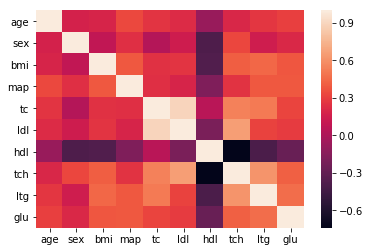

In [3]:
sns.heatmap(data.corr())

In [4]:
data['ldl'].corr(data['tc'])

0.8966629578104901

Text(0.5,1,'tc By ldl')

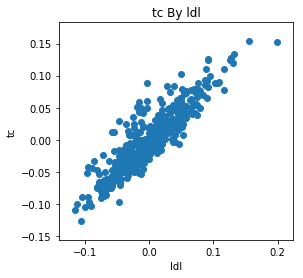

In [5]:
plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(data.ldl,data.tc)
plt.xlabel('ldl')
plt.ylabel('tc')
plt.title('tc By ldl')

The features ldl and tc have a strong, positive correlation and will work for our toy example.

### Quick PCA Walkthrough:

#### 1. Standardize the features. Subtract their respective means and divide by their respective standard deviations:

In [6]:
meanvector = [data.ldl.mean(),data.tc.mean()]
sdvector = [data.ldl.std(),data.tc.std()]
data = (data[['ldl','tc']] - meanvector)/sdvector

#### 2. Calculate $\mathbf{X}^T \mathbf{X}$  

In [7]:
X = np.array(data)
X[0:6,:] #first few rows

array([[-0.73123602, -0.92869347],
       [-0.40243013, -0.17742321],
       [-0.71808378, -0.95758848],
       [ 0.52480246,  0.25600194],
       [ 0.32751893,  0.08263188],
       [-1.66504473, -1.44880365]])

#### 3. Calculate the eigenvalues and the eigenvector matrix of $\mathbf{X}^T \mathbf{X}$ :  $\mathbf{V}$

In [8]:
w, V = LA.eig(X.transpose() @ X)
print(w) #eigenvalues
V #matrix of eigenvectors   

[836.42836439  45.57163561]


array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

The columns of this matrix are the eigenvectors, pointing towards the directions of greatest variation for the data. They will become the new axes after the features are transformed into principle components! This is visualized below:

Text(0.5,1,'tc By ldl With Eigenvectors')

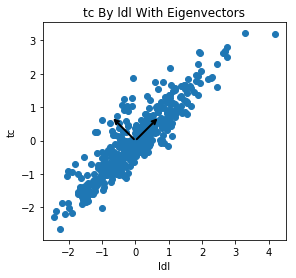

In [9]:
plt.scatter(data.ldl,data.tc)
plt.gca().set_aspect('equal', adjustable='box')
plt.annotate(s='', xytext=(0,0), xy=(0.70710678,0.70710678), arrowprops=dict(arrowstyle='->', facecolor='black', linewidth=2))
plt.annotate(s='', xytext=(0,0), xy=(-0.70710678,0.70710678), arrowprops=dict(arrowstyle='->',facecolor='black', linewidth=2))
plt.xlabel('ldl')
plt.ylabel('tc')
plt.title('tc By ldl With Eigenvectors')

The two black arrows are the eigenvectors of $\mathbf{X}^T \mathbf{X}$. If you imagine that the two black arrows became the new axes (rotate the graph clockwise about 45 degrees), you would no longer see a pattern signifying strong positive correlation between the features, rather the points would seem to be randomly distributed.

#### 4. Find the Principle Component Matrix: $\mathbf{X} \mathbf{V}$

In [10]:
PC = X @ V

In [11]:
PC[0:5,:]

array([[-1.1737474 , -0.1396235 ],
       [-0.41001823,  0.15910392],
       [-1.18487922, -0.16935539],
       [ 0.55211209, -0.19007067],
       [ 0.29002042, -0.17316129]])

Text(0.5,1,'Principle Components')

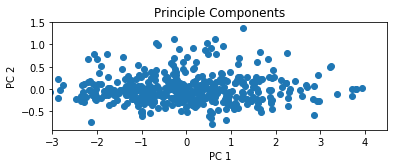

In [12]:
plt.scatter(PC[:,0],PC[:,1])
LA.eig(PC.transpose() @ PC)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.xlim([-3,4.5])
plt.title('Principle Components')

Here you can see the plot of the two principle components. It is exactly as described! The principle components seem uncorrelated, let us check!

In [13]:
print(np.corrcoef(PC[:,0],PC[:,1])) #floating point precision gives extremely small values instead of 0!
print(np.round(np.corrcoef(PC[:,0],PC[:,1])))

[[1.00000000e+00 1.02357825e-17]
 [1.02357825e-17 1.00000000e+00]]
[[1. 0.]
 [0. 1.]]


The principle components are uncorrelated! Now we can't forget about the eigenvalues. According to my claim in the beginning of this exercise, the ratio of each PC's corresponding eigenvalue to the sum of the eigenvalues is the percentage of variability in the data that the Principle Component captures. Let us quickly verify this:

In [14]:
print(w[0]/sum(w)) #The first principle component should capture ~95 percent of the variability in the data.
print(np.var(PC[:,0])/(np.var(PC[:,0])+np.var(PC[:,1])))#Exactly right!
print(w[1]/sum(w)) 
print(np.var(PC[:,1])/(np.var(PC[:,0])+np.var(PC[:,1]))) #Check's out for the second Principle Component as well!

0.9483314789052448
0.9483314789052449
0.05166852109475524
0.051668521094755115


The ratio of the corresponding eigenvalue to the sum of eigenvalues is in fact the percentage of variance captured by the Principle Component!

### So why do we use PCA?

#### Dimension Reduction

As explained in the introduction, you may face a high-dimensional dataset with many correlated features. This occurs often in the real world, such as data concerning geneme mapping. In such cases one could perform feature selection by using the absolute loss function through Lasso which drives certain features to 0 or the squared loss function in Ridge Regression which shrinks coefficients; however, since the variables are correlated PCA is also a great option! While PCA does not select from the original features, it does have the capability to perform dimensionality reduction:

Imagine if you set a tolerance of how much variability you wanted your model to capture, perhaps that you want to keep the components that keep explain 90 percent of the variability of the data ($\mathbf{\alpha} = 0.90$). You can rank the eigenvalues from largest to smallest:

$\mathbf{\lambda_{i}>..>\lambda_{k}>..>\lambda_{p}}$

and keep the first $\mathbf{k}$ Principle Components whose summation of eigenvalues in this ordered list captures at least 90 percent of the variability of the data according to the ratio:

$\mathbf{\dfrac{\sum_{i=1}^{k}\lambda_{i}}{\sum_{i=1}^{p}\lambda_{i}}}$$ \hspace{2mm} > \hspace{2mm} \mathbf{\alpha}\hspace{2mm} = \hspace{2mm} 90$

In the case of our toy example, the first component capures nearly 95 percent of the variability of the data, so we would throw out the second component, meaning our final data matrix would actually just be a single column, reducing the dimensions from 2 to 1. Imagine having thousands of feaures; PCA may yield a few hundred components that capture the vast majority of the variability within the data. 

#### Feature Extraction

As mentioned earlier, unlike other methods such as Lasso/Ridge regression, PCA does not perform feature selection as it does not leave you with a smaller set of the original features. Instead it transforms the features into a set of transformed, uncorrelated features, from which you can choose a subset that sufficiently captures the variability of the original data. Since this subset is of lower dimension, it can be utilized to create a predictive model that requires less computational resources.

### Conclusion

PCA is a simple, but powerful tool! It does not take very many steps, and it allows you to make an unwieldy dataset easier to manage, while creating a set of potentially useful features to work with. However, the next time you are faced with a slew of nominal, categorical variables and suddenly go from twenty predictors to nearly a hundred due to dummy encoding, you may want to look into other factorization methods, such as Multiple Correspondence Analysis or Non-Negative Matrix Factorization, as PCA may not give the best results with binary variables.